### Importing Libraries

In [59]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt


### Connection String

In [60]:
user = 'teste'
passw = 'teste'
dbname = 'teste_db'
host = 'localhost' 
port = '5437' 

conn_string = f"dbname='{dbname}' user='{user}' password='{passw}' host='{host}' port='{port}'"
conn = psycopg2.connect(conn_string)

### Data Analysis

In [61]:
query = "SELECT * FROM public.ptax"
df = pd.read_sql(query, conn)
conn.close()

C:\Users\tarmi\AppData\Local\Temp\ipykernel_17580\681036953.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [62]:
df['sk_data'] = pd.to_datetime(df['sk_data'], format='%Y%m%d')
df.columns = ['Data', 'Tipo', 'Valor', 'Data_Cadastro']

#### Menor e Maior Valor de Compra

In [63]:
df_compra = df[df['Tipo'] == 'Euro/Compra']
menor_valor_compra = df_compra['Valor'].min()
maior_valor_compra = df_compra['Valor'].max()

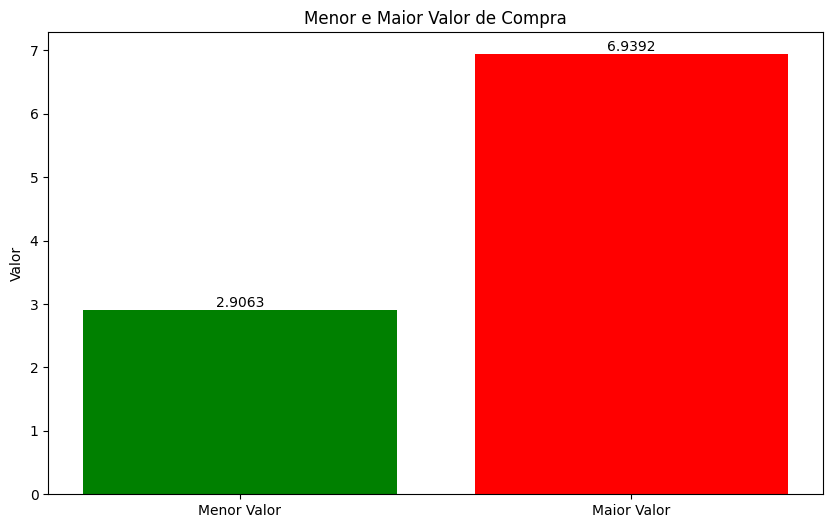

In [64]:
plt.figure(figsize=(10, 6))

valores = [menor_valor_compra, maior_valor_compra]
posicoes = range(len(valores))

barras = plt.bar(posicoes, valores, color=['green', 'red'])

for bar in barras:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura, f'{altura:.4f}', ha='center', va='bottom')

plt.xticks(posicoes, ['Menor Valor', 'Maior Valor'])
plt.ylabel('Valor')
plt.title('Menor e Maior Valor de Compra')
plt.show()

#### Menor e Maior Valor de Venda

In [65]:
df_venda = df[df['Tipo'] == 'Euro/Venda']
menor_valor_venda = df_venda['Valor'].min()
maior_valor_venda = df_venda['Valor'].max()

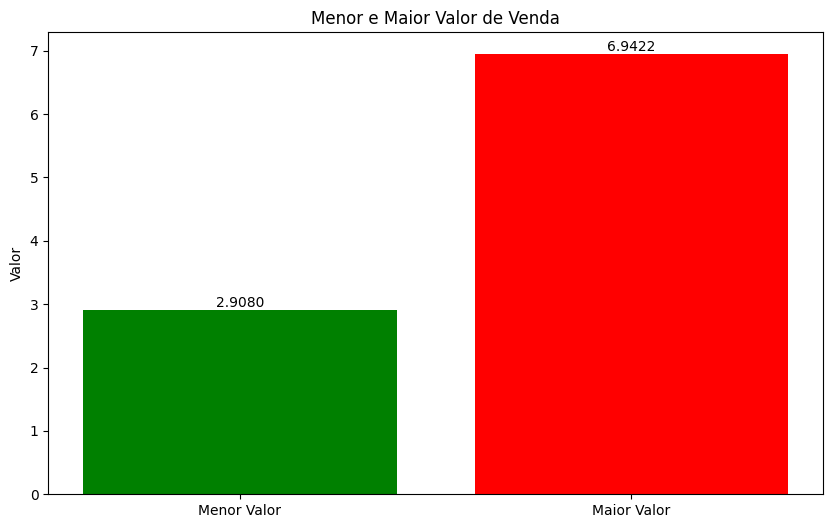

In [66]:
plt.figure(figsize=(10, 6))

valores_venda = [menor_valor_venda, maior_valor_venda]
posicoes_venda = range(len(valores_venda))

barras_venda = plt.bar(posicoes_venda, valores_venda, color=['green', 'red'])

for bar in barras_venda:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura, f'{altura:.4f}', ha='center', va='bottom')

plt.xticks(posicoes_venda, ['Menor Valor', 'Maior Valor'])
plt.ylabel('Valor')
plt.title('Menor e Maior Valor de Venda')
plt.show()

#### Variação do Euro/Compra ao longo do Tempo

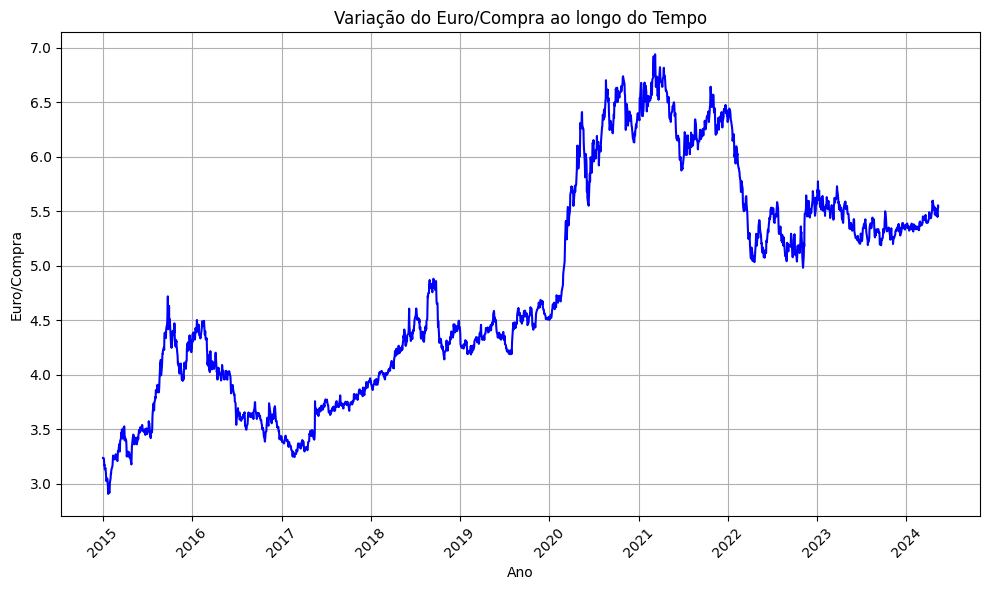

In [67]:
plt.figure(figsize=(10, 6))

df_compra = df_compra.sort_values(by='Data')

plt.plot(df_compra['Data'], df_compra['Valor'], linestyle='-', color='b')
plt.title('Variação do Euro/Compra ao longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Euro/Compra')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()